In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.interpolate import interp1d
import pickle


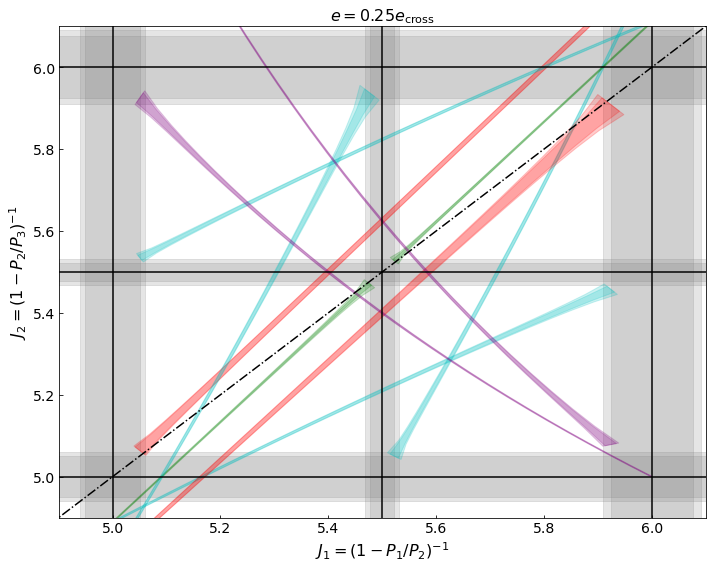

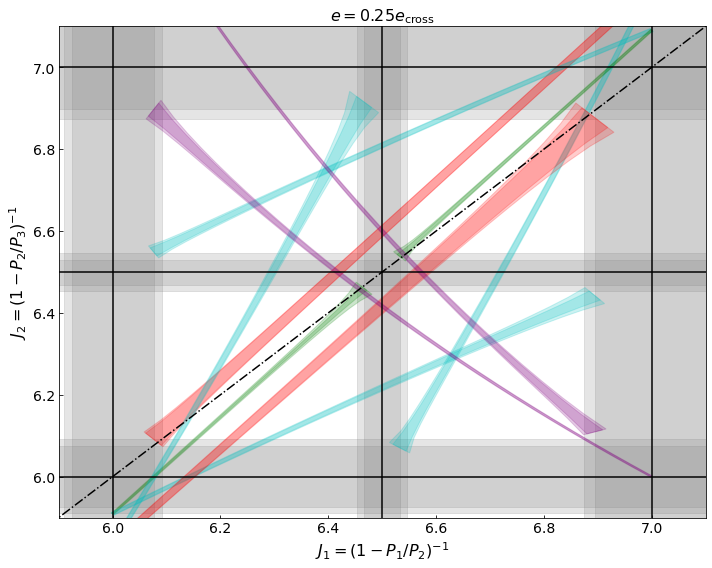

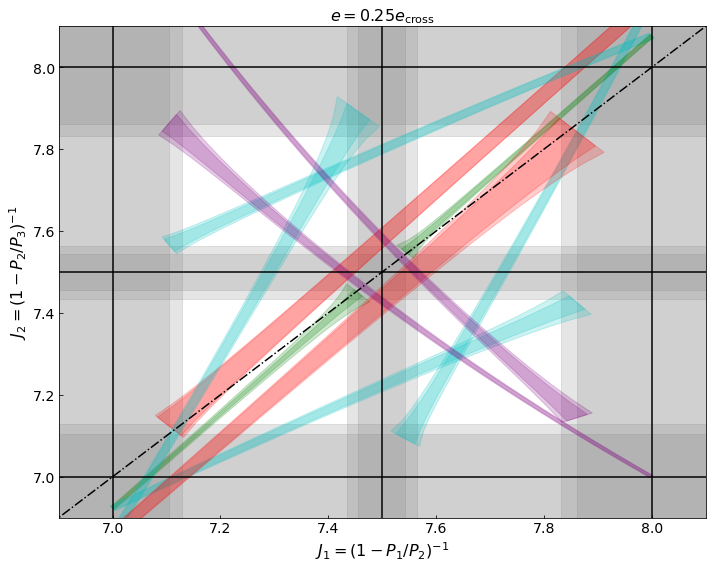

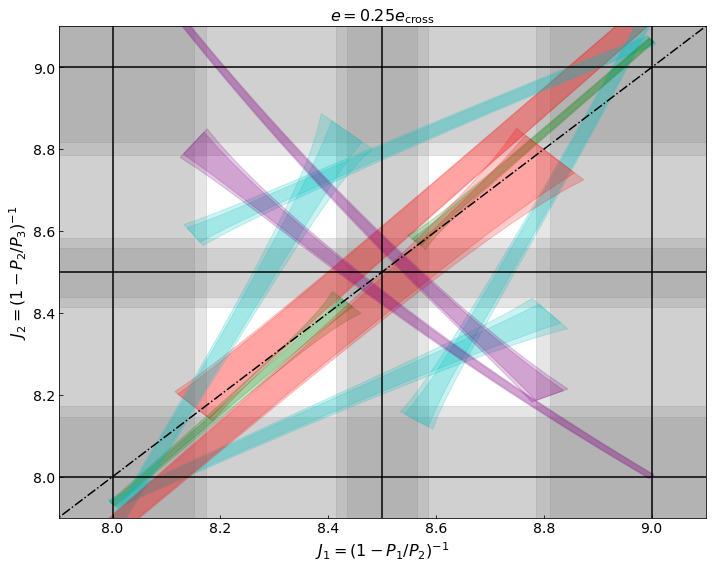

In [2]:
for J in [5,6,7,8]:
    with open("../code/resonance_web_data_J{}.pkl".format(J),"rb") as fi:
        rw_data = pickle.load(fi)
    n_ext = rw_data['n_ext']
    n_ext2 = rw_data['n_ext2']
    inner_sx_m = rw_data['inner_sx_m']
    inner_sx_p = rw_data['inner_sx_p']
    outer_sx_m = rw_data['outer_sx_m']
    outer_sx_p = rw_data['outer_sx_p']
    MMRs = [(J,1),(2*J+1,2),(J+1,1)]

    fig = plt.figure(figsize=(10,8))
    J_in_min,J_in_max,J_out_min,J_out_max = [{} for _ in range(4)]
    for j,k in MMRs:
        plt.axvline(j/k,color='k')
        plt.axhline(j/k,color='k')
        # inner MMRs
        for i in range(2):
            n_median = inner_sx_m[(j,k)][i]
            J_in_max[(j,k)] = 1 + 1/(n_median[0]/n_median[1]-1)
            n_median = inner_sx_p[(j,k)][i]
            J_in_min[(j,k)] = 1 + 1/(n_median[0]/n_median[1]-1)
            plt.fill_betweenx(np.linspace(J-0.2,J+1.2),J_in_min[(j,k)],J_in_max[(j,k)],alpha=0.2,color='gray')

        # outer MMRs
        for i in range(2):
            n_median = outer_sx_m[(j,k)][i]
            J_out_max[(j,k)] = 1 + 1/(n_median[1]/n_median[2]-1)
            n_median = outer_sx_p[(j,k)][i]
            J_out_min[(j,k)] = 1 + 1/(n_median[1]/n_median[2]-1)
            plt.fill_between(np.linspace(J-0.2,J+1.2),J_out_min[(j,k)],J_out_max[(j,k)],alpha=0.2,color='gray')

    plt.ylim(J-0.1,J+1.1)
    plt.xlim(J-0.1,J+1.1)


    #J_x_plot = np.linspace()
    for j1,k1 in MMRs:
        Jin_min = J_in_min[(j1,k1)]
        Jin_max = J_in_max[(j1,k1)]

        for j2,k2 in MMRs:
            if k1+k2 > 4:
                continue
            col = 'rcgb'[k1+k2-2]
            Jout_min = J_out_min[(j2,k2)]
            Jout_max = J_out_max[(j2,k2)]

            if (j1,k1,j2,k2) in n_ext.keys():
                n_ext_p_50,n_ext_m_50,n_ext_p_max,n_ext_m_max= n_ext[(j1,k1,j2,k2)]
                for n_p,n_m in ((n_ext_p_50,n_ext_m_50),(n_ext_p_max,n_ext_m_max)):
                    xp = 1+1/(n_p.T[0]/n_p.T[1]-1)
                    yp = 1+1/(n_p.T[1]/n_p.T[2]-1)
                    xm = 1+1/(n_m.T[0]/n_m.T[1]-1)
                    ym = 1+1/(n_m.T[1]/n_m.T[2]-1)
                    plt.fill(np.append(xp,xm[::-1]),np.append(yp,ym[::-1]),color=col,alpha=0.2)

            if (j1,k1,j2,k2) in n_ext2.keys():
                n_ext_p_50,n_ext_m_50,n_ext_p_max,n_ext_m_max= n_ext2[(j1,k1,j2,k2)]
                for n_p,n_m in ((n_ext_p_50,n_ext_m_50),(n_ext_p_max,n_ext_m_max)):
                    xp = 1+1/(n_p.T[0]/n_p.T[1]-1)
                    yp = 1+1/(n_p.T[1]/n_p.T[2]-1)
                    xm = 1+1/(n_m.T[0]/n_m.T[1]-1)
                    ym = 1+1/(n_m.T[1]/n_m.T[2]-1)
                    plt.fill(np.append(xp,xm[::-1]),np.append(yp,ym[::-1]),color=col,alpha=0.2)

    plt.plot(np.linspace(J-1,J+2),np.linspace(J-1,J+2),'k-.')

    for key,val in rw_data['n_ext_plus'].items():
        j1,k1,j2,k2 = key
        n_ext_p_50,n_ext_m_50,n_ext_p_max,n_ext_m_max = val
        for n_p,n_m in ((n_ext_p_50,n_ext_m_50),(n_ext_p_max,n_ext_m_max)):
            xp = 1+1/(n_p.T[0]/n_p.T[1]-1)
            yp = 1+1/(n_p.T[1]/n_p.T[2]-1)
            xm = 1+1/(n_m.T[0]/n_m.T[1]-1)
            ym = 1+1/(n_m.T[1]/n_m.T[2]-1)

            plt.fill(np.append(xp,xm[::-1]),np.append(yp,ym[::-1]),color='purple',alpha=0.2)
    plt.xlabel("$J_1=(1-P_1/P_2)^{-1}$",fontsize=16)        
    plt.ylabel("$J_2=(1-P_2/P_3)^{-1}$",fontsize=16)
    plt.title("$e = 0.25e_\mathrm{cross}$",fontsize=16)
    plt.tick_params(direction='in',labelsize=14)
    plt.tight_layout()
    plt.savefig("../figures/web_0_25ex_J{}.png".format(J))

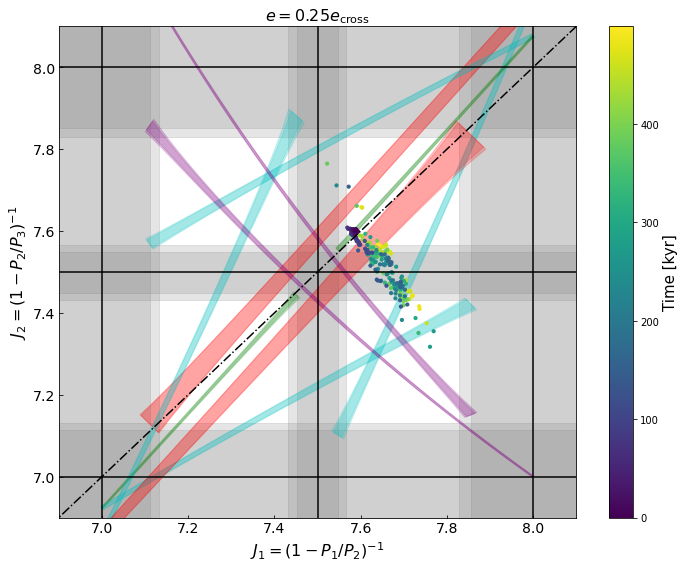

In [52]:
J=7
with open("../code/resonance_web_data_J{}.pkl".format(J),"rb") as fi:
    rw_data = pickle.load(fi)
n_ext = rw_data['n_ext']
n_ext2 = rw_data['n_ext2']
inner_sx_m = rw_data['inner_sx_m']
inner_sx_p = rw_data['inner_sx_p']
outer_sx_m = rw_data['outer_sx_m']
outer_sx_p = rw_data['outer_sx_p']
MMRs = [(J,1),(2*J+1,2),(J+1,1)]

fig = plt.figure(figsize=(10,8))
J_in_min,J_in_max,J_out_min,J_out_max = [{} for _ in range(4)]
for j,k in MMRs:
    plt.axvline(j/k,color='k')
    plt.axhline(j/k,color='k')
    # inner MMRs
    for i in range(2):
        n_median = inner_sx_m[(j,k)][i]
        J_in_max[(j,k)] = 1 + 1/(n_median[0]/n_median[1]-1)
        n_median = inner_sx_p[(j,k)][i]
        J_in_min[(j,k)] = 1 + 1/(n_median[0]/n_median[1]-1)
        plt.fill_betweenx(np.linspace(J-0.2,J+1.2),J_in_min[(j,k)],J_in_max[(j,k)],alpha=0.2,color='gray')

    # outer MMRs
    for i in range(2):
        n_median = outer_sx_m[(j,k)][i]
        J_out_max[(j,k)] = 1 + 1/(n_median[1]/n_median[2]-1)
        n_median = outer_sx_p[(j,k)][i]
        J_out_min[(j,k)] = 1 + 1/(n_median[1]/n_median[2]-1)
        plt.fill_between(np.linspace(J-0.2,J+1.2),J_out_min[(j,k)],J_out_max[(j,k)],alpha=0.2,color='gray')

plt.ylim(J-0.1,J+1.1)
plt.xlim(J-0.1,J+1.1)


#J_x_plot = np.linspace()
for j1,k1 in MMRs:
    Jin_min = J_in_min[(j1,k1)]
    Jin_max = J_in_max[(j1,k1)]

    for j2,k2 in MMRs:
        if k1+k2 > 4:
            continue
        col = 'rcgb'[k1+k2-2]
        Jout_min = J_out_min[(j2,k2)]
        Jout_max = J_out_max[(j2,k2)]

        if (j1,k1,j2,k2) in n_ext.keys():
            n_ext_p_50,n_ext_m_50,n_ext_p_max,n_ext_m_max= n_ext[(j1,k1,j2,k2)]
            for n_p,n_m in ((n_ext_p_50,n_ext_m_50),(n_ext_p_max,n_ext_m_max)):
                xp = 1+1/(n_p.T[0]/n_p.T[1]-1)
                yp = 1+1/(n_p.T[1]/n_p.T[2]-1)
                xm = 1+1/(n_m.T[0]/n_m.T[1]-1)
                ym = 1+1/(n_m.T[1]/n_m.T[2]-1)
                plt.fill(np.append(xp,xm[::-1]),np.append(yp,ym[::-1]),color=col,alpha=0.2)

        if (j1,k1,j2,k2) in n_ext2.keys():
            n_ext_p_50,n_ext_m_50,n_ext_p_max,n_ext_m_max= n_ext2[(j1,k1,j2,k2)]
            for n_p,n_m in ((n_ext_p_50,n_ext_m_50),(n_ext_p_max,n_ext_m_max)):
                xp = 1+1/(n_p.T[0]/n_p.T[1]-1)
                yp = 1+1/(n_p.T[1]/n_p.T[2]-1)
                xm = 1+1/(n_m.T[0]/n_m.T[1]-1)
                ym = 1+1/(n_m.T[1]/n_m.T[2]-1)
                plt.fill(np.append(xp,xm[::-1]),np.append(yp,ym[::-1]),color=col,alpha=0.2)

plt.plot(np.linspace(J-1,J+2),np.linspace(J-1,J+2),'k-.')

for key,val in rw_data['n_ext_plus'].items():
    j1,k1,j2,k2 = key
    n_ext_p_50,n_ext_m_50,n_ext_p_max,n_ext_m_max = val
    for n_p,n_m in ((n_ext_p_50,n_ext_m_50),(n_ext_p_max,n_ext_m_max)):
        xp = 1+1/(n_p.T[0]/n_p.T[1]-1)
        yp = 1+1/(n_p.T[1]/n_p.T[2]-1)
        xm = 1+1/(n_m.T[0]/n_m.T[1]-1)
        ym = 1+1/(n_m.T[1]/n_m.T[2]-1)

        plt.fill(np.append(xp,xm[::-1]),np.append(yp,ym[::-1]),color='purple',alpha=0.2)
plt.xlabel("$J_1=(1-P_1/P_2)^{-1}$",fontsize=16)        
plt.ylabel("$J_2=(1-P_2/P_3)^{-1}$",fontsize=16)
plt.title("$e = 0.25e_\mathrm{cross}$",fontsize=16)
plt.tick_params(direction='in',labelsize=14)


P_to_J = lambda P: 1 + 1/(P-1)
J_to_P = lambda J: J/(J-1)
data = np.load("chaotic_traj.npz")
P_mean = data['P_mean']
times = data['times']
msk = times<0.5e6
x=P_to_J(P_mean[1]/P_mean[0])[msk]
y=P_to_J(P_mean[2]/P_mean[1])[msk]
amd = data['amd_mean']
z = amd[msk]/amd[0]-1
plt.scatter(x[::-1],y[::-1],c=times[msk][::-1]/1e3,s=10)
cb = plt.colorbar()
cb.set_label(label='Time [kyr]',size= 15)
plt.tight_layout()
plt.savefig("../figures/web_with_points.png")


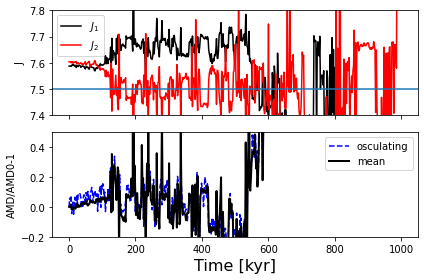

In [51]:
data = np.load("chaotic_traj.npz")
P = data['P']
P_mean = data['P_mean']
amd_mean = data['amd_mean']
amd = data['amd']
fig,ax = plt.subplots(2,1,sharex=True)
plt.sca(ax[0])
# l,=plt.plot(times/1e3,P_to_J(P[1]/P[0]),'r--')
plt.plot(times/1e3,P_to_J(P_mean[1]/P_mean[0]),'-',color='k',label="$J_1$")
# l,=plt.plot(times/1e3,P_to_J(P[2]/P[1]),'k--')
plt.plot(times/1e3,P_to_J(P_mean[2]/P_mean[1]),'-',color='r',label="$J_2$")
plt.ylim(7.4,7.8)
plt.axhline(7.5)
ax[0].set_ylabel("J")
ax[0].legend()

ax[1].plot(times/1e3,amd/amd[0]-1,'b--',label='osculating')
ax[1].plot(times/1e3,amd_mean/amd_mean[0]-1,'k',label='mean',lw=2)
ax[1].legend()
ax[1].set_ylabel("AMD/AMD0-1")
ax[1].set_ylim(-0.2,0.5)
plt.axhline(15/13,color='k',ls='--')
ax[1].set_xlabel("Time [kyr]",fontsize = 16)
plt.tight_layout()
plt.savefig("../figures/J_and_amd.png")

In [64]:
from celmech.poisson_series_manipulate import bracket

In [65]:
bracket(rw_data['inner_Pjk'][(15,2)].conj,-1j * rw_data['outer_Pjk'][(15,2)]).as_expression()

2.2164124070886e-6⋅\bar{z}₂⋅z₁ - 2.3371951731986e-6⋅\bar{z}₂⋅z₂ - 2.33839939575348e-6⋅\bar{z}₃⋅z₁ + 2.465829808246
11e-6⋅\bar{z}₃⋅z₂

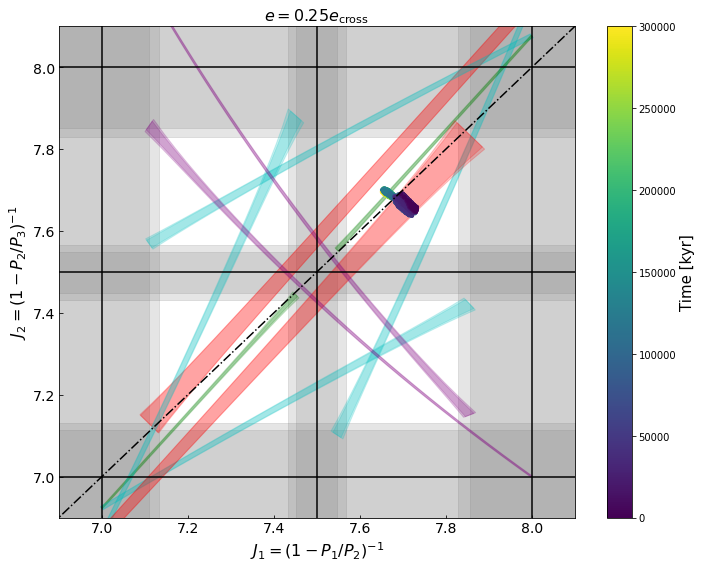

In [59]:
J=7
with open("../code/resonance_web_data_J{}.pkl".format(J),"rb") as fi:
    rw_data = pickle.load(fi)
n_ext = rw_data['n_ext']
n_ext2 = rw_data['n_ext2']
inner_sx_m = rw_data['inner_sx_m']
inner_sx_p = rw_data['inner_sx_p']
outer_sx_m = rw_data['outer_sx_m']
outer_sx_p = rw_data['outer_sx_p']
MMRs = [(J,1),(2*J+1,2),(J+1,1)]

fig = plt.figure(figsize=(10,8))
J_in_min,J_in_max,J_out_min,J_out_max = [{} for _ in range(4)]
for j,k in MMRs:
    plt.axvline(j/k,color='k')
    plt.axhline(j/k,color='k')
    # inner MMRs
    for i in range(2):
        n_median = inner_sx_m[(j,k)][i]
        J_in_max[(j,k)] = 1 + 1/(n_median[0]/n_median[1]-1)
        n_median = inner_sx_p[(j,k)][i]
        J_in_min[(j,k)] = 1 + 1/(n_median[0]/n_median[1]-1)
        plt.fill_betweenx(np.linspace(J-0.2,J+1.2),J_in_min[(j,k)],J_in_max[(j,k)],alpha=0.2,color='gray')

    # outer MMRs
    for i in range(2):
        n_median = outer_sx_m[(j,k)][i]
        J_out_max[(j,k)] = 1 + 1/(n_median[1]/n_median[2]-1)
        n_median = outer_sx_p[(j,k)][i]
        J_out_min[(j,k)] = 1 + 1/(n_median[1]/n_median[2]-1)
        plt.fill_between(np.linspace(J-0.2,J+1.2),J_out_min[(j,k)],J_out_max[(j,k)],alpha=0.2,color='gray')

plt.ylim(J-0.1,J+1.1)
plt.xlim(J-0.1,J+1.1)


#J_x_plot = np.linspace()
for j1,k1 in MMRs:
    Jin_min = J_in_min[(j1,k1)]
    Jin_max = J_in_max[(j1,k1)]

    for j2,k2 in MMRs:
        if k1+k2 > 4:
            continue
        col = 'rcgb'[k1+k2-2]
        Jout_min = J_out_min[(j2,k2)]
        Jout_max = J_out_max[(j2,k2)]

        if (j1,k1,j2,k2) in n_ext.keys():
            n_ext_p_50,n_ext_m_50,n_ext_p_max,n_ext_m_max= n_ext[(j1,k1,j2,k2)]
            for n_p,n_m in ((n_ext_p_50,n_ext_m_50),(n_ext_p_max,n_ext_m_max)):
                xp = 1+1/(n_p.T[0]/n_p.T[1]-1)
                yp = 1+1/(n_p.T[1]/n_p.T[2]-1)
                xm = 1+1/(n_m.T[0]/n_m.T[1]-1)
                ym = 1+1/(n_m.T[1]/n_m.T[2]-1)
                plt.fill(np.append(xp,xm[::-1]),np.append(yp,ym[::-1]),color=col,alpha=0.2)

        if (j1,k1,j2,k2) in n_ext2.keys():
            n_ext_p_50,n_ext_m_50,n_ext_p_max,n_ext_m_max= n_ext2[(j1,k1,j2,k2)]
            for n_p,n_m in ((n_ext_p_50,n_ext_m_50),(n_ext_p_max,n_ext_m_max)):
                xp = 1+1/(n_p.T[0]/n_p.T[1]-1)
                yp = 1+1/(n_p.T[1]/n_p.T[2]-1)
                xm = 1+1/(n_m.T[0]/n_m.T[1]-1)
                ym = 1+1/(n_m.T[1]/n_m.T[2]-1)
                plt.fill(np.append(xp,xm[::-1]),np.append(yp,ym[::-1]),color=col,alpha=0.2)

plt.plot(np.linspace(J-1,J+2),np.linspace(J-1,J+2),'k-.')

for key,val in rw_data['n_ext_plus'].items():
    j1,k1,j2,k2 = key
    n_ext_p_50,n_ext_m_50,n_ext_p_max,n_ext_m_max = val
    for n_p,n_m in ((n_ext_p_50,n_ext_m_50),(n_ext_p_max,n_ext_m_max)):
        xp = 1+1/(n_p.T[0]/n_p.T[1]-1)
        yp = 1+1/(n_p.T[1]/n_p.T[2]-1)
        xm = 1+1/(n_m.T[0]/n_m.T[1]-1)
        ym = 1+1/(n_m.T[1]/n_m.T[2]-1)

        plt.fill(np.append(xp,xm[::-1]),np.append(yp,ym[::-1]),color='purple',alpha=0.2)
plt.xlabel("$J_1=(1-P_1/P_2)^{-1}$",fontsize=16)        
plt.ylabel("$J_2=(1-P_2/P_3)^{-1}$",fontsize=16)
plt.title("$e = 0.25e_\mathrm{cross}$",fontsize=16)
plt.tick_params(direction='in',labelsize=14)


P_to_J = lambda P: 1 + 1/(P-1)
J_to_P = lambda J: J/(J-1)
data = np.load("chaotic_traj_J0_7.70.npz")
P_mean = data['P_mean']
times = data['times']
msk = times<1.5e6
x=P_to_J(P_mean[1]/P_mean[0])[msk]
y=P_to_J(P_mean[2]/P_mean[1])[msk]
amd = data['amd_mean']
z = amd[msk]/amd[0]-1
plt.scatter(x[::-1],y[::-1],c=times[msk][::-1],s=10)
cb = plt.colorbar()
cb.set_label(label='Time [kyr]',size= 15)
plt.tight_layout()
